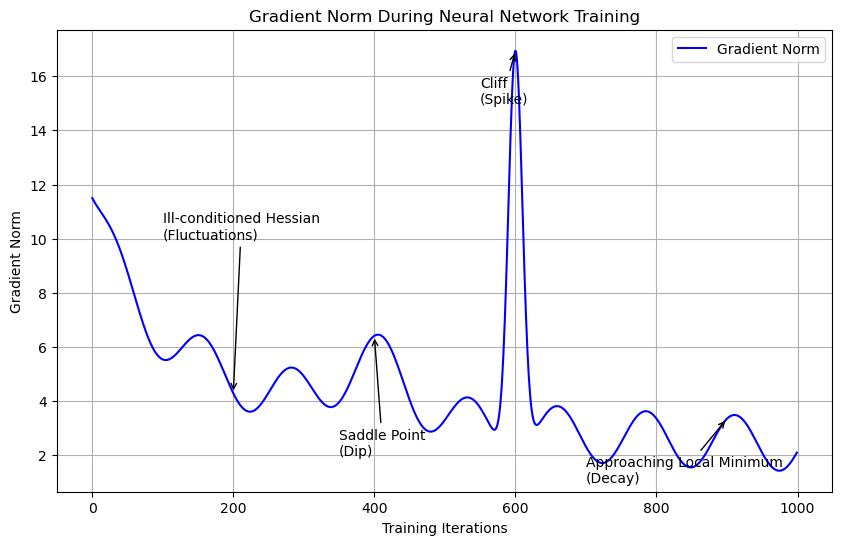

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate training iterations
iterations = np.arange(0, 1000, 1)

# Simulate gradient norm with components for each scenario
np.random.seed(42)
base_norm = 10 / (1 + 0.01 * iterations)  # Decaying norm (approaching local minimum)
ill_conditioned = 2 * np.sin(0.05 * iterations) + 3  # Fluctuations for ill-conditioned Hessian
saddle_point = 2 * np.exp(-((iterations - 400) ** 2) / 5000)  # Dip near saddle point at iteration 400
cliff = 15 * np.exp(-((iterations - 600) ** 2) / 200)  # Spike at cliff at iteration 600

# Combine components (weighted to emphasize features)
gradient_norm = base_norm + 0.5 * ill_conditioned + saddle_point + cliff
gradient_norm = np.clip(gradient_norm, 0, None)  # Ensure non-negative norms

# Plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, gradient_norm, label='Gradient Norm', color='blue')
plt.xlabel('Training Iterations')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm During Neural Network Training')
plt.grid(True)

# Annotate key events
plt.annotate('Ill-conditioned Hessian\n(Fluctuations)', xy=(200, gradient_norm[200]), 
             xytext=(100, 10), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Saddle Point\n(Dip)', xy=(400, gradient_norm[400]), 
             xytext=(350, 2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Cliff\n(Spike)', xy=(600, gradient_norm[600]), 
             xytext=(550, 15), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Approaching Local Minimum\n(Decay)', xy=(900, gradient_norm[900]), 
             xytext=(700, 1), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.show()